## Table of contents

### 01. Import Data and Libraries

### #2 Please see the file "4.9 Intro to Data Visualization with Python"

### #3 Descriptive findings about sales

### #4 The distribution of orders among customers in terms of loyalty

### #5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

### #6 Exploratory analysis of customer demographics to inform the targeted marketing campaigns

### #7  Explore whether there’s a connection between age and spending power (income)

### 01. Import Data and Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Define path
path = r'C:\Users\iryna\Documents\Data analytics\Career foundry\4. Python\06-2022 Instacart Basket Analysis'

In [4]:
# Import Data
ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merged.pkl'))

In [5]:
# Checking the output
ords_prods.shape

(32404859, 33)

In [9]:
# Checking the data type
ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   order_day_of_week              int8    
 4   order_time_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     float64 
 7   add_to_cart_order              float64 
 8   reordered                      float64 
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest day                    object  
 16  busiest days                   object  
 17  busiest_period_of_day    

In [10]:
# Changing data type into int32 to reduce the file size
ords_prods['aisle_id'] = ords_prods['aisle_id'].astype('int32')
ords_prods['department_id'] = ords_prods['department_id'].astype('int32')
ords_prods['age'] = ords_prods['age'].astype('int32')
ords_prods['dependants_#'] = ords_prods['dependants_#'].astype('int32')
ords_prods['income'] = ords_prods['income'].astype('int32')

In [11]:
ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   order_day_of_week              int8    
 4   order_time_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     float64 
 7   add_to_cart_order              float64 
 8   reordered                      float64 
 9   product_name                   object  
 10  aisle_id                       int32   
 11  department_id                  int32   
 12  prices                         float64 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest day                    object  
 16  busiest days                   object  
 17  busiest_period_of_day    

In [13]:
# Exporting reduced file size
ords_prods.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merged_s.pkl'))

### #2 Please see the file "4.9 Intro to Data Visualization with Python"

### #3 Descriptive findings about sales

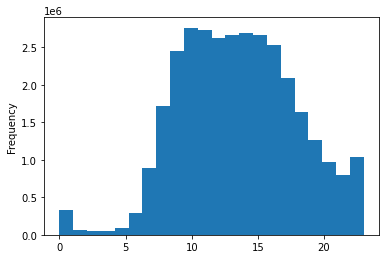

In [23]:
# Create a histogram of the “order_hour_of_day” column
hist = ords_prods['order_time_of_day'].plot.hist(bins = 22)

#### The histogram depicts how often orders are placed within the day. The numbers of total order (M) is y-axis and the hour of the day is x-axis. The busiest hours are from 9am until 4pm.

In [24]:
# Checking placed orders per hour 
ords_prods['order_time_of_day'].value_counts(dropna=False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_time_of_day, dtype: int64

In [26]:
ords_prods['order_time_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_time_of_day, dtype: int64

In [27]:
# Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_time_of_day.png'))

### #4 The distribution of orders among customers in terms of loyalty

<AxesSubplot:>

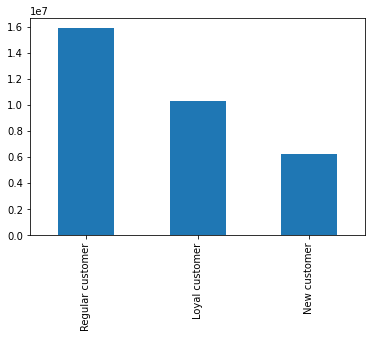

In [28]:
# Create a bar chart from the “loyalty_flag” column
ords_prods['loyalty_flag'].value_counts().plot.bar()

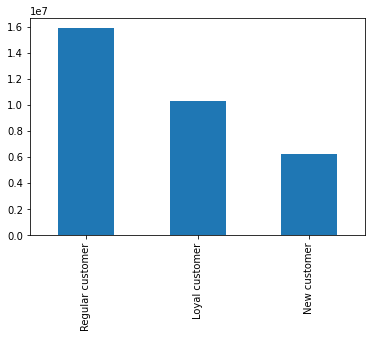

In [29]:
bar_loyalty_flag = ords_prods['loyalty_flag'].value_counts().plot.bar()

In [30]:
# Checking the bar chart
ords_prods.groupby('loyalty_flag').agg({'order_number': ['count']})

,order_number
,count
loyalty_flag,
Loyal customer,10284093
New customer,6243990
Regular customer,15876776


In [31]:
# Exporting the bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_layalty_flag.png'))

### #5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [33]:
# Set the seed
# Create a list holding True/False values to the test np.random.rand() <= 0.8
np.random.seed(4)
dev_prices = np.random.rand(len(ords_prods)) <= 0.8

In [35]:
# Sampling: store 80% of the sample in the dataframe big and 20% in the dataframe small
big = ords_prods[dev_prices]
small = ords_prods[~dev_prices]

In [36]:
# Checking the length
len(ords_prods)

32404859

In [37]:
len(big)+len(small)

32404859

In [38]:
# Reducing the samples to only those columns necessary for the chart
ords_prods_time_hour = small[['order_time_of_day','prices']]

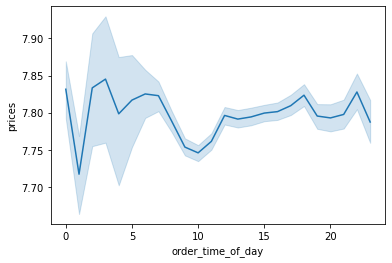

In [39]:
# Creating the line chart
line = sns.lineplot(data = ords_prods_time_hour, x = 'order_time_of_day',y = 'prices')

In [40]:
# Exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_daytime_price.png'))

### #6 Exploratory analysis of customer demographics to inform the targeted marketing campaigns

In [41]:
# Set the seed
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev_age = np.random.rand(len(ords_prods)) <= 0.7

In [42]:
# Sampling: store 70% of the sample in the dataframe big and 30% in the dataframe small
big_age = ords_prods[dev_age]
small_age = ords_prods[~dev_age]

In [43]:
# Checking the length
len(ords_prods)

32404859

In [44]:
len(big_age)+len(small_age)

32404859

In [45]:
# Reducing the samples to only those columns necessary for the chart
ords_prods_age_depend = small_age[['age','dependants_#']]

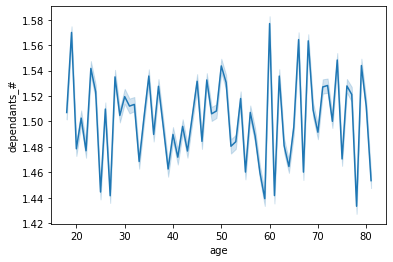

In [46]:
# Creating the line chart
line_age_dep = sns.lineplot(data = ords_prods_age_depend, x = 'age',y = 'dependants_#')

#### The line chart shows the number of dependants (y-axis) and the age of the Instacart customers (x-axis). The high volatility chart depicts that there is no relationship between age and # of dependants. 

In [48]:
# Exporting the line chart
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_depend.png'))

### #7  Explore whether there’s a connection between age and spending power (income)

In [49]:
# Seed and subset created in the step #6
# New dataframes are created for the task
big_age_income =  big_age
small_age_income = small_age

In [50]:
# Checking the length
len(big_age_income)+len(small_age_income)

32404859

In [51]:
# Reducing the samples to only those columns necessary for the chart
ords_prods_age_income = small_age_income[['age','income']]

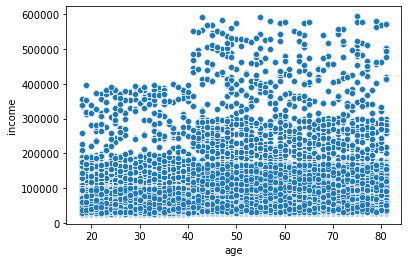

In [53]:
# Creating a Scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_age_income)

#### The scatterplot depicts age of Instacart customers (x-axis) and their income (y axis). Peage younger 40 have income up to 200K in most cases with a max 400K, older than 40 the income increases up to 300K  and the maximum income is ~600K. Customers >40 years old have more income and they can spend potentially more.

In [54]:
# Exporting the scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))